In [2]:
import pandas as pd
import numpy as np
import time

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss, accuracy_score, mean_squared_error, mean_absolute_error, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [5]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data"
data = pd.read_csv(url)
data.columns = ["Recency", "Frequency", "Monetary", "Time", "Target"]

In [6]:
print(data.isnull().sum())

Recency      0
Frequency    0
Monetary     0
Time         0
Target       0
dtype: int64


In [7]:
data = data.fillna(method='ffill')

C:\Users\Vishnu\AppData\Local\Temp\ipykernel_16764\917065080.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


In [8]:
print("Duplicates:", data.duplicated().sum())

Duplicates: 215


In [9]:
data = data.drop_duplicates()

In [10]:
print(data.dtypes)

Recency      int64
Frequency    int64
Monetary     int64
Time         int64
Target       int64
dtype: object


In [11]:
data['Recency'] = pd.to_numeric(data['Recency'], errors='coerce')
data['Frequency'] = pd.to_numeric(data['Frequency'], errors='coerce')
data['Monetary'] = pd.to_numeric(data['Monetary'], errors='coerce')
data['Time'] = pd.to_numeric(data['Time'], errors='coerce')
data['Target'] = data['Target'].astype(int)

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['Recency', 'Frequency', 'Monetary', 'Time']] = scaler.fit_transform(data[['Recency', 'Frequency', 'Monetary', 'Time']])

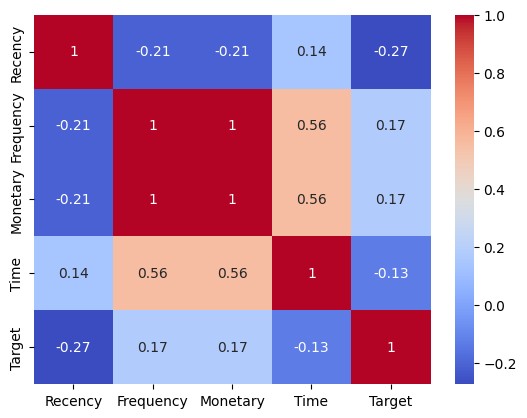

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.show()

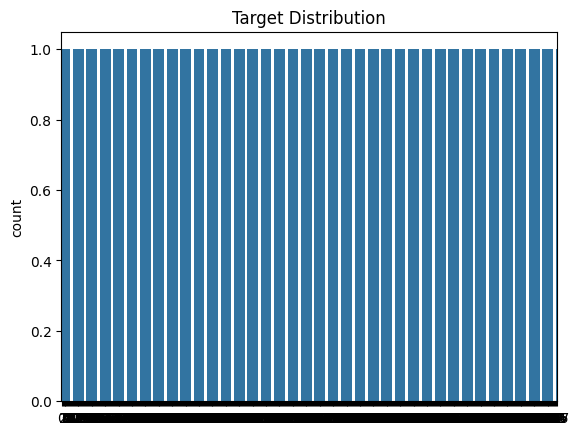

In [14]:
sns.countplot(data['Target'])
plt.title("Target Distribution")
plt.show()

In [16]:
X = data[['Recency', 'Frequency', 'Monetary', 'Time']]
y = data['Target']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
start_time = time.time()
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
train_time = time.time() - start_time

In [19]:
start_time = time.time()
y_pred = rf.predict(X_test)
y_pred_prob = rf.predict_proba(X_test)
test_time = time.time() - start_time

In [20]:
accuracy = accuracy_score(y_test, y_pred)
log_loss_value = log_loss(y_test, y_pred_prob)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [21]:
mse_pred = [round(prob[1]) for prob in y_pred_prob]
mae_pred = [round(prob[1]) for prob in y_pred_prob]

In [22]:
mse_accuracy = accuracy_score(y_test, mse_pred)
mae_accuracy = accuracy_score(y_test, mae_pred)

In [23]:
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Log Loss: {log_loss_value:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print("\nAccuracy Evaluations for 'Loss Models':")
print(f"Accuracy for Log Loss Model: {accuracy:.4f}")
print(f"Accuracy for MSE Model: {mse_accuracy:.4f}")
print(f"Accuracy for MAE Model: {mae_accuracy:.4f}")
print(f"  Training Time: {train_time:.4f} seconds")
print(f"  Testing Time: {test_time:.4f} seconds")

Evaluation Metrics:
Accuracy: 0.6262
Log Loss: 0.6234
Mean Squared Error (MSE): 0.3738
Mean Absolute Error (MAE): 0.3738

Accuracy Evaluations for 'Loss Models':
Accuracy for Log Loss Model: 0.6262
Accuracy for MSE Model: 0.6262
Accuracy for MAE Model: 0.6262
  Training Time: 0.1977 seconds
  Testing Time: 0.0290 seconds


In [24]:
metrics = ["Log Loss", "Mean Squared Error", "Mean Absolute Error"]
values = [log_loss_value, mse, mae]

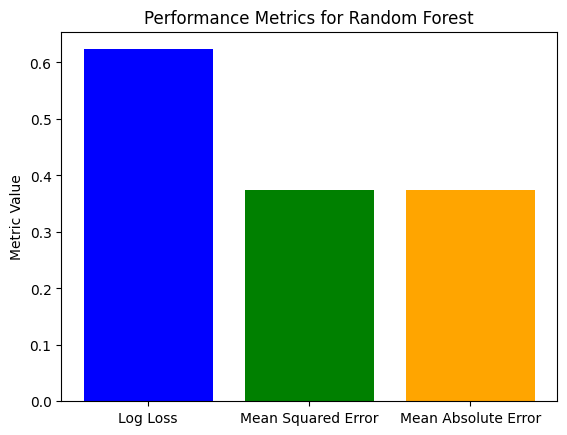

In [25]:
plt.bar(metrics, values, color=['blue', 'green', 'orange'])
plt.title("Performance Metrics for Random Forest")
plt.ylabel("Metric Value")
plt.show()

In [29]:
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred))


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        80
           1       0.26      0.26      0.26        27

    accuracy                           0.63       107
   macro avg       0.50      0.50      0.50       107
weighted avg       0.63      0.63      0.63       107

